# Riddler Classic

### November 15, 2019

You are given a fair, unweighted 10-sided die with sides labeled 0 to 9 and a sheet of paper to record your score. (If the very notion of a fair 10-sided die bothers you, and you need to know what sort of three-dimensional solid it is, then forget it — you have a random number generator that gives you an integer value from 0 to 9 with equal probability. Your loss — the die was a collector’s item.)

To start the game, you roll the die. Your current “score” is the number shown, divided by 10. For example, if you were to roll a 7, then your score would be 0.7. Then, you keep rolling the die over and over again. Each time you roll, if the digit shown by the die is less than or equal to the last digit of your score, then that roll becomes the new last digit of your score. Otherwise you just go ahead and roll again. The game ends when you roll a zero.

For example, suppose you roll the following: 6, 2, 5, 1, 8, 1, 0. After your first roll, your score would be 0.6, After the second, it’s 0.62. You ignore the third roll, since 5 is greater than the current last digit, 2. After the fourth roll, your score is 0.621. You ignore the fifth roll, since 8 is greater than the current last digit, 1. After the sixth roll, your score is 0.6211. And after the seventh roll, the game is over — 0.6211 is your final score.

What will be your average final score in this game?

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

Define functions to generate randoms, then to parse them, adding according to the rules given

In [2]:
def generate_rands(nrands=100):
    """generate sufficiently long string of numbers"""
    return np.random.randint(low=0, high=10, size=nrands)

In [3]:
def parse_rands(randlist):
    """Takes list of random numbers"""
    solution = []
    breaking_condition = False
    for i, element in enumerate(randlist):
        if element == 0: break # Breaking condition
        elif i == 0: # Starting condition
            solution.append(element)
        else:
            # Validate list is long enough (really should consider recursive solution)
            if i == len(randlist)-1:
                print("Generated string not long enough!")
            # Check if larger than previous number
            if element <= solution[-1]: solution.append(element)
    
    if len(solution) == 0: solution = [0]
    return solution         

In [4]:
def join_solution_list(solutions):
    trailing_str_values = "".join([str(x) for x in solutions])
    concat = "0."+trailing_str_values
    return(float(concat))

Simulate many trials

In [5]:
number_of_rolls = []
solutions = []
ntrials = 100_000_000
for trials in range(0,ntrials):
    these_vals = generate_rands(500)
    solution = parse_rands(these_vals)
    number_of_rolls.append(len(solution))
    solutions.append(join_solution_list(solution))

Plot some sanity plots, length of solution, as well as just the values themselves.

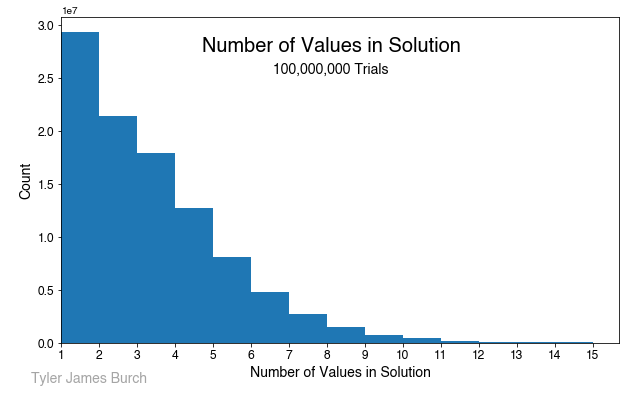

In [6]:
fig = plt.figure(figsize=(10,6))
_ = plt.hist(number_of_rolls, bins=np.arange(1,16,1))
plt.xlim(left=1)
plt.xlabel("Number of Values in Solution",fontsize=14)
plt.ylabel("Count",fontsize=14)
ax = plt.gca()
ax.tick_params(axis='both', which='major', labelsize=12)
plt.xticks(np.arange(1,16,1))
plt.annotate(s="Tyler James Burch", xy=(.05,.03), xycoords='figure fraction',
             textcoords='figure fraction', color='grey',alpha=0.7, fontsize=14)

plt.figtext(.5,.80,f"Number of Values in Solution", fontsize=20,ha="center")
plt.figtext(.5,.75,f"{ntrials:,} Trials", fontsize=14, ha='center')
plt.savefig("nValues")

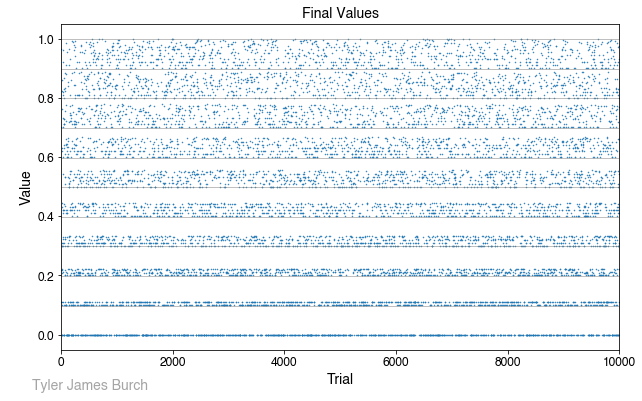

In [7]:
fig = plt.figure(figsize=(10,6))
x = np.arange(1,len(solutions[:10000])+1)
plt.scatter(x, solutions[:10000],s=1, marker='.', )
# Plot upper bounds for each band
ax = plt.gca()
for i in np.arange(0.098,1,0.1):
    ax.axhline(i,linewidth= 0.5, color="grey")

plt.xlim(left=0, right=len(solutions[:10000])+1)
plt.xlabel("Trial",fontsize=14)
plt.ylabel("Value",fontsize=14)
ax.tick_params(axis='both', which='major', labelsize=12)
plt.title("Final Values",fontsize=14)
plt.annotate(s="Tyler James Burch", xy=(.05,.03), xycoords='figure fraction',
             textcoords='figure fraction', color='grey',alpha=0.7, fontsize=14)
plt.savefig("values")

Evaluate running mean, summing along list, then dividing by how long the list is at each step.

In [8]:
sumdf = pd.DataFrame(solutions)
sumdf["cumsum"] = sumdf[0].cumsum()
sumdf["cummean"] = sumdf["cumsum"] / (sumdf.index+1)
running_mean = sumdf["cummean"].to_numpy()

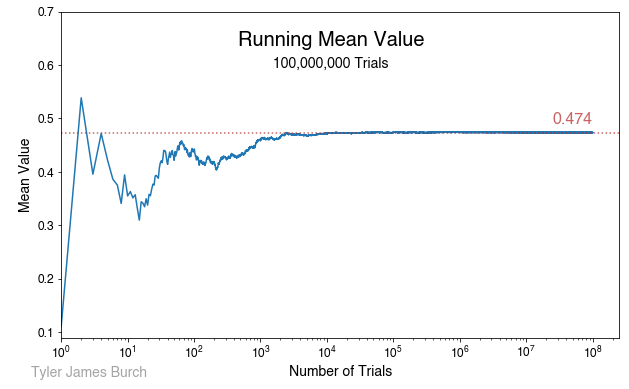

In [11]:
fig = plt.figure(figsize=(10,6))
ax = plt.gca()
ax.set_xscale('log')
x = np.arange(1,len(solutions)+1)
plt.plot(x,running_mean)
ax.axhline(running_mean[-1],linestyle=":",color="firebrick",alpha=0.7)
plt.annotate(round(running_mean[-1],3),
        xy=(len(x),running_mean[-1]+.01), xycoords="data", 
        ha="right", va="bottom", color="firebrick",alpha=0.7, fontsize=16)

plt.xlim(left=1)
plt.ylim(top=0.7)
plt.xlabel("Number of Trials",fontsize=14)
plt.ylabel("Mean Value",fontsize=14)
ax.tick_params(axis='both', which='major', labelsize=12)
plt.annotate(s="Tyler James Burch", xy=(.05,.03), xycoords='figure fraction',
             textcoords='figure fraction', color='grey',alpha=0.7, fontsize=14)
plt.figtext(.5,.80,f"Running Mean Value", fontsize=20,ha="center")
plt.figtext(.5,.75,f"{ntrials:,} Trials", fontsize=14, ha='center')
plt.savefig("running_mean")

Most accurate solution will be the last value of this list - taking all the trials and finding the mean of all of them.

In [10]:
print(f"Final Solution: {running_mean[-1]:.3f}")

Final Solution: 0.474
